In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from pathlib import Path

from cycler import cycler

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches


from matplotlib import rcParams

import numpy as np
import pandas as pd


import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import geopandas as gpd

import intro_plots as ip

paper_path = Path('../../paper/figures/')

slide_path = Path('../../slides/figures/intro/')
proposal_path = Path('../../draft/figures/intro/')
#rcParams['font.family'] = 'Segoe Print'

In [5]:
ny_all = pd.read_csv("nydata")

ny = ny_all[ny_all['NAME'].isin(ip.cdict.keys())].copy()

ny['DATES'] = pd.to_datetime(ny['DATE'])

nymap = ny.groupby('NAME').agg({'TAVG':'mean', 'LATITUDE':'mean', 'LONGITUDE':'mean'})

nygdf = gpd.GeoDataFrame(nymap['TAVG'],  geometry=gpd.points_from_xy(nymap['LONGITUDE'], nymap['LATITUDE']))

ny['TEMP'] = ny['TAVG'].apply(lambda x: f"{x:2.2f}")

dfs = ny[['DATE', 'LATITUDE', 'LONGITUDE', 'TEMP', 'NAME']].sort_values(by='DATE').head(10)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', 
                                         category='cultural', name=shapename)
nystate = gpd.read_file(states_shp)

In [6]:
nyjfk = ny[ny['NAME'].str.contains("JFK")]

In [7]:
nyjfk['TAVG2'] = nyjfk['TAVG']*2

<ipython-input-7-688456fd7f20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyjfk['TAVG2'] = nyjfk['TAVG']*2


In [8]:
nyjfk['TEMP2'] = nyjfk['TAVG2'].apply(lambda x: f"{x:2.2f}")

<ipython-input-8-78e30aac7beb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyjfk['TEMP2'] = nyjfk['TAVG2'].apply(lambda x: f"{x:2.2f}")


In [9]:
dfs = nyjfk.head(10)

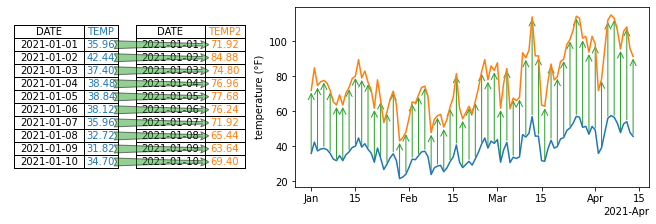

In [54]:
fig, axd = plt.subplot_mosaic([['tab1','tab2', 'time']], 
                              gridspec_kw={'width_ratios':[1,1,3]},
                              constrained_layout=True, figsize=(9,3))

ocolor = 'tab:blue'
scolor = 'tab:orange'
gcolor = 'tab:green'
table_1 = ip.plot_table(axd['tab1'], dfs[['DATE', 'TEMP']], ['k', ocolor], textcolor=None)
table_2 = ip.plot_table(axd['tab2'], dfs[['DATE', 'TEMP2']], ['k', scolor], textcolor=None)
#table_1[(0,1)].get_text().set_text('TEMPERATURE')
#table_2[(0,1)].get_text().set_text('TEMPERATURE')

axd['time'].plot('DATES', 'TAVG', data=nyjfk, color=ocolor)
axd['time'].plot('DATES', 'TAVG2', data=nyjfk, color=scolor)
axd['time'].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.MonthLocator()))
axd['time'].set_ylabel("temperature (°F)")

for (i, (d, t1, t2)) in nyjfk[['DATES', 'TAVG', 'TAVG2']].iloc[::2].iterrows():
    a1 = mpatches.FancyArrowPatch((d, t1), (d,t2), arrowstyle="->",  
                                  linestyle=None, mutation_scale=15, color=gcolor)
    axd['time'].add_artist(a1)


yval = [0.9415011037527594, 0.8311258278145696, 0.7207505518763797, 
        0.6103752759381899, 0.5, 0.38962472406181026, 
        0.2792494481236204, 0.16887417218543058, 0.05849889624724073,
        -0.05187637969094911]
x = 0.9565654013203635

for y in yval:
    arrow = mpatches.ConnectionPatch(xyA=(x-.05,y), coordsA=axd['tab1'].transData,
                                     xyB=(x-.3,y), coordsB=axd['tab2'].transData,   
                                     arrowstyle="fancy", mutation_scale=20, 
                                     facecolor=gcolor, edgecolor='black', alpha=.5)
    fig.add_artist(arrow)

fig.savefig(proposal_path/"equivariant.png")

In [32]:
#counteracting weird scope bug
yv = []
for ((r1, c1), t1), ((r2, c2), t2) in zip(table_1.get_celld().items(), table_2.get_celld().items()):
    assert r1==r2 and c1==c2
    if r1==0 or c1==0: continue
    x1, y1 = ip.source_cell(cell=t1, color=ocolor, xr=1.45)
    x2, y2 = ip.source_cell(cell=t2, color=scolor, xr=1)
    assert y1==y2
    yv.append(y1)
print(x1)
print(yv)

0.9565654013203635
[0.9415011037527594, 0.8311258278145696, 0.7207505518763797, 0.6103752759381899, 0.5, 0.38962472406181026, 0.2792494481236204, 0.16887417218543058, 0.05849889624724073, -0.05187637969094911]


dict_items([((1, 0), <matplotlib.table.Cell object at 0x000001FC3F591FA0>), ((1, 1), <matplotlib.table.Cell object at 0x000001FC3F59FF10>), ((2, 0), <matplotlib.table.Cell object at 0x000001FC3F5B00A0>), ((2, 1), <matplotlib.table.Cell object at 0x000001FC3F5B01F0>), ((3, 0), <matplotlib.table.Cell object at 0x000001FC3F5B0340>), ((3, 1), <matplotlib.table.Cell object at 0x000001FC3F5B0490>), ((4, 0), <matplotlib.table.Cell object at 0x000001FC3F5B05E0>), ((4, 1), <matplotlib.table.Cell object at 0x000001FC3F5B0730>), ((5, 0), <matplotlib.table.Cell object at 0x000001FC3F5B0880>), ((5, 1), <matplotlib.table.Cell object at 0x000001FC3F5B09D0>), ((6, 0), <matplotlib.table.Cell object at 0x000001FC3F5B0B20>), ((6, 1), <matplotlib.table.Cell object at 0x000001FC3F5B0CA0>), ((7, 0), <matplotlib.table.Cell object at 0x000001FC3F5B0DF0>), ((7, 1), <matplotlib.table.Cell object at 0x000001FC3F5B0F40>), ((8, 0), <matplotlib.table.Cell object at 0x000001FC3F5B60D0>), ((8, 1), <matplotlib.table.C

In [14]:
table_2.get_celld().items()

dict_items([((1, 0), <matplotlib.table.Cell object at 0x000001FC3F5B6D00>), ((1, 1), <matplotlib.table.Cell object at 0x000001FC3F5B6F40>), ((2, 0), <matplotlib.table.Cell object at 0x000001FC3F5C00D0>), ((2, 1), <matplotlib.table.Cell object at 0x000001FC3F5C0220>), ((3, 0), <matplotlib.table.Cell object at 0x000001FC3F5C0370>), ((3, 1), <matplotlib.table.Cell object at 0x000001FC3F5C04C0>), ((4, 0), <matplotlib.table.Cell object at 0x000001FC3F5C0610>), ((4, 1), <matplotlib.table.Cell object at 0x000001FC3F5C0760>), ((5, 0), <matplotlib.table.Cell object at 0x000001FC3F5C08B0>), ((5, 1), <matplotlib.table.Cell object at 0x000001FC3F5C0A00>), ((6, 0), <matplotlib.table.Cell object at 0x000001FC3F5C0B50>), ((6, 1), <matplotlib.table.Cell object at 0x000001FC3F5C0CA0>), ((7, 0), <matplotlib.table.Cell object at 0x000001FC3F5C0DF0>), ((7, 1), <matplotlib.table.Cell object at 0x000001FC3F5C0F40>), ((8, 0), <matplotlib.table.Cell object at 0x000001FC3F5C60D0>), ((8, 1), <matplotlib.table.C

In [ ]:
table = np.array([["sun", 1], ["clouds", 4], ['rain', 2], ['lightning', 3], ['storm', 2]])

In [ ]:
fig, axd = plt.subplot_mosaic([['tab','plot'], ['tab', 'bar']], gridspec_kw={'width_ratios':[1,1]}, 
                              constrained_layout=True, figsize=(6,2))

tab = axd['tab'].table(cellText=table.astype('str'), bbox=(0, 0, 1, 1))
tab.set_fontsize('xx-large')
axd['tab'].set(xticks=[], yticks=[], aspect='equal')
axd['plot'].plot(table[:,0], table[:,1].astype(int), color='tab:green')
axd['bar'].bar(table[:,0], table[:,1].astype(int), color='tab:green')
for n in ['bar', 'plot']:
    #axd[n].set_ylim(0,4.1)
    axd[n].set_ylabel("frequency")
    axd[n].xaxis.set_tick_params(rotation=0)
    axd[n].set_yticks([0, 2.5, 5])
    axd[n].set_yticklabels(['0', '2.5', '5'])
axd['bar'].set_ylim(0,5)
axd['plot'].set_ylim(0, 5)

fig.savefig(paper_path/"continuity.png")

In [ ]:
nybar = nygdf.reset_index()
nybar['TEMP'] = nybar['TAVG'].apply(lambda x: f"{x:2.2f}")

In [ ]:
nybar['SHORT'] = nybar['NAME'].str.replace("NEW YORK|AP|INTL|ISLIP LI|GTR|SYRACUSE", "", regex=True)

In [ ]:
nybar['NAME']

In [ ]:
fig, axd = plt.subplot_mosaic([['tab','plot'], ['tab', 'bar']], gridspec_kw={'width_ratios':[1,1]}, 
                              constrained_layout=True, figsize=(12,4))
tab = plot_table(axd['tab'], nybar[['NAME', 'TEMP']], ['k', 'tab:green'], textcolor=None)
tab[(0,1)].get_text().set_text("Temperature")
tab[(0,0)].get_text().set_text("Station")
tab[(0,1)].get_text().set_color("k")
for i in range(len(cdict)):
    station = tab[(i+1,0)].get_text().get_text()
    tab[(i+1,0)].set_facecolor(cdict[station])
    tab[(i+1,0)].set_alpha(.25)
    tab[(i+1,0)].get_text().set_color("black")
axd['bar'].bar(nybar['SHORT'], nybar['TAVG'], color=[cdict[n] for n in nybar['NAME']])
axd['bar'].tick_params("x", rotation=90)
axd['plot'].tick_params("x", rotation=90)
axd['plot'].plot(nybar['SHORT'], nybar['TAVG'], color='tab:green')
axd['plot'].sharex(axd['bar'])
axd['plot'].sharey(axd['bar'])
axd['bar'].set_yticks([0,10,20,30])
axd['bar'].set_xlim(-0.75,13.75)
axd['bar'].set_ylabel("Average Temp (°F)")
axd['plot'].set_ylabel("Average Temp (°F)")
fig.subplots_adjust(hspace=0.)

fig.savefig(proposal_path/"continuity.png")

In [ ]:
df['']

In [ ]:
tab[(0,0)].get_text?

In [ ]:
tab[(0,0)].get_text().get_text()

In [ ]:
fig, axd = plt.subplot_mosaic([['tab','plot'], ['tab', 'bar']], gridspec_kw={'width_ratios':[1,1]}, 
                              constrained_layout=True, figsize=(6,2))
